# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

621

In [104]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

units = "imperial"


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [105]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=castro
Processing Record 2 | Boat of Garten
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=boat of garten
Processing Record 3 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=new norfolk
Processing Record 4 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=waingapu
Processing Record 5 | Narrabri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=narrabri
Processing Record 6 | Las Vegas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=las vegas
Processing Record 7 | Mataura
http://api.openweathermap.org/data/2.5/

City not found. Skipping...
Processing Record 57 | Bahadurgarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=bahadurgarh
Processing Record 58 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=egvekinot
City not found. Skipping...
Processing Record 59 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=waipawa
Processing Record 60 | Tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=tomatlan
Processing Record 61 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=nome
Processing Record 62 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=los llanos de aridane
Processing Record 63 | Kloulklubed
http://api.openweathe

Processing Record 112 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=chapais
Processing Record 113 | Moose Factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=moose factory
Processing Record 114 | Tres Arroyos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=tres arroyos
Processing Record 115 | Quang Ngai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=quang ngai
Processing Record 116 | Xico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=xico
Processing Record 117 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=mar del plata
Processing Record 118 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac

Processing Record 168 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=norman wells
Processing Record 169 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=hofn
Processing Record 170 | Biggar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=biggar
Processing Record 171 | Back Mountain
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=back mountain
Processing Record 172 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=nantucket
Processing Record 173 | El Escorial
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=el escorial
Processing Record 174 | Tselinnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283

Processing Record 224 | Erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=erzin
Processing Record 225 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=esperance
Processing Record 226 | Shimsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=shimsk
Processing Record 227 | Luena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=luena
Processing Record 228 | Aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=aquiraz
Processing Record 229 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=dunedin
City not found. Skipping...
Processing Record 230 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1

City not found. Skipping...
Processing Record 279 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=cidreira
City not found. Skipping...
Processing Record 280 | Namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=namatanai
Processing Record 281 | Bjerkvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=bjerkvik
Processing Record 282 | Nizwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=nizwa
Processing Record 283 | Mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=mareeba
City not found. Skipping...
Processing Record 284 | Southbridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=southbridge
Processing Record 285 | Yekaterinoslavka
http:

Processing Record 334 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=poum
Processing Record 335 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=coquimbo
Processing Record 336 | Kostomuksha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=kostomuksha
City not found. Skipping...
Processing Record 337 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=padang
Processing Record 338 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=saint-pierre
Processing Record 339 | Kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=kangaatsiaq
Processing Record 340 | Tooele
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 389 | Jiwani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=jiwani
Processing Record 390 | Novikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=novikovo
Processing Record 391 | Caranavi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=caranavi
Processing Record 392 | Vina del Mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=vina del mar
Processing Record 393 | Suzun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=suzun
Processing Record 394 | Champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=champerico
Processing Record 395 | Oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed73069

Processing Record 444 | Shirokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=shirokiy
City not found. Skipping...
Processing Record 445 | Pulandian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=pulandian
Processing Record 446 | Hikari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=hikari
Processing Record 447 | Chingirlau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=chingirlau
Processing Record 448 | Urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=urengoy
Processing Record 449 | Karasjok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=karasjok
City not found. Skipping...
Processing Record 450 | Suileng
http://api.openweathermap.org/data/2.5/wea

Processing Record 500 | Toyooka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=toyooka
Processing Record 501 | Ust-Kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=ust-kuyga
Processing Record 502 | Vytegra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=vytegra
Processing Record 503 | Mansehra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=mansehra
Processing Record 504 | Taybad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=taybad
Processing Record 505 | Djibo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=djibo
Processing Record 506 | Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac9f9c9b90283f09b49c1ed730698a62&q=westpo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
     
# Create a dictonary with the lists generated
city_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
city_weather = pd.DataFrame(city_dict)

# Display count of weather data values 
city_weather.count()


city_weather.to_csv("Weather_Dataframe.csv")
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Castro,0,CL,1561715904,100,-42.48,-73.76,28.40,5.82
1,Boat of Garten,20,GB,1561716084,87,57.25,-3.76,72.00,4.70
2,New Norfolk,0,AU,1561715924,58,-42.78,147.06,59.00,9.17
3,Waingapu,1,ID,1561716086,69,-9.65,120.26,73.46,11.99
4,Narrabri,0,AU,1561716088,48,-30.33,149.78,62.01,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

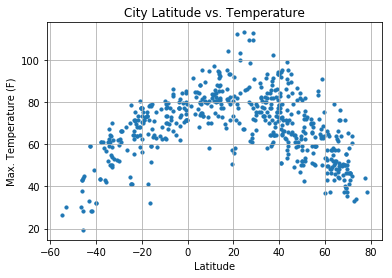

In [107]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure_.png")
plt.savefig("Latitude_vs_Temperature.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

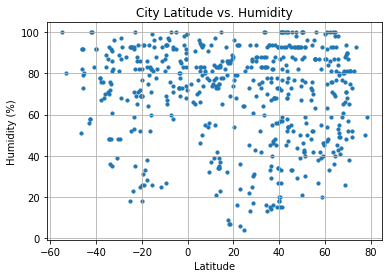

In [109]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

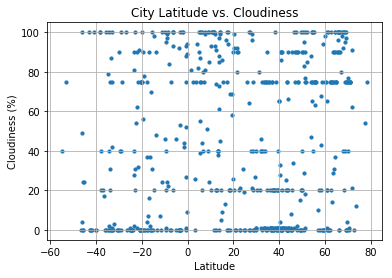

In [111]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

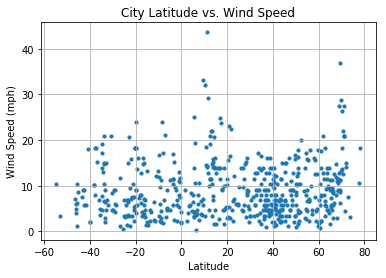

In [112]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()